<a href="https://colab.research.google.com/github/rofikoab1603/DS-13/blob/main/Data_Prediksi_Harga_Rumah_(Rofiko).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. ## Konek G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## I.1 Load Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

In [ ]:
# Load data train
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Implementation 3/train.csv')
print(f"Bentuk Set Train : {data_train.shape}")

# Load data test
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Implementation 3/test.csv')
print(f"Bentuk Set Test : {data_test.shape}")

Bentuk Set Train : (1460, 81)
Bentuk Set Test : (1459, 80)


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Cek kolom yang sama di kedua data
perbedaan_1 = [x for x in data_train.columns if x not in data_test.columns]
print(f"Kolom yang ada di data_train dan tidak ada di data_test : {perbedaan_1}")

perbedaan_2 = [x for x in data_test.columns if x not in data_train.columns]
print(f"Kolom yang ada di data_test dan tidak ada di data_train: {perbedaan_2}")

Kolom yang ada di data_train dan tidak ada di data_test : ['SalePrice']
Kolom yang ada di data_test dan tidak ada di data_train: []


In [ ]:
# Hilangkan kolom 'Id' di data_train
data_train.drop(["Id"], axis=1, inplace=True)

# Simpan kolom 'Id' sebelum menghilangkan di data_test
daftar_id_test = data_test["Id"].tolist()
data_test.drop(["Id"], axis=1, inplace=True)

## I.2 Fitur Numerikal

### I.2.1 Explore and clean Fitur Numerikal

In [ ]:
# Pilih kolom data numerikal di data_train
data_train_num = data_train.select_dtypes(exclude=["object"])
data_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
data_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [ ]:
# Hilangkan kolom yang nilai konstannya atau sama sebebsar 95%
sel = VarianceThreshold(threshold=0.05) 

# Kumpukan semua kolom yang variansinya konstan
sel.fit(data_train_num.iloc[:, :-1]) # semua kolom kecuali 'SalePrice'

VarianceThreshold(threshold=0.05)

In [ ]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# Jumlahkan nilai yang tidak konstan
print(f"Jumlah nilai masih digunakan: {sum(sel.get_support())}")
print(f"Jumlah nilai yang quasi konstan: {len(data_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

Jumlah nilai masih digunakan: 35
Jumlah nilai yang quasi konstan: 1


In [ ]:
data_train_num.iloc[:, :-1].columns[sel.get_support()]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
data_train_num.iloc[:, :-1].columns[~sel.get_support()]

Index(['KitchenAbvGr'], dtype='object')

In [ ]:
data_train_num['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [ ]:
daftar_fitur_quasi_konstan = data_train_num.iloc[:, :-1].columns[~sel.get_support()].tolist()
print(f"Quasi Kontan yang dihilangkan : {daftar_fitur_quasi_konstan}")

Quasi Kontan yang dihilangkan : ['KitchenAbvGr']


In [ ]:
# Hilangkan kolom-kolom yang berisi quasi konstan dari jumlah data_train
data_train_num.drop(daftar_fitur_quasi_konstan, axis=1, inplace=True)

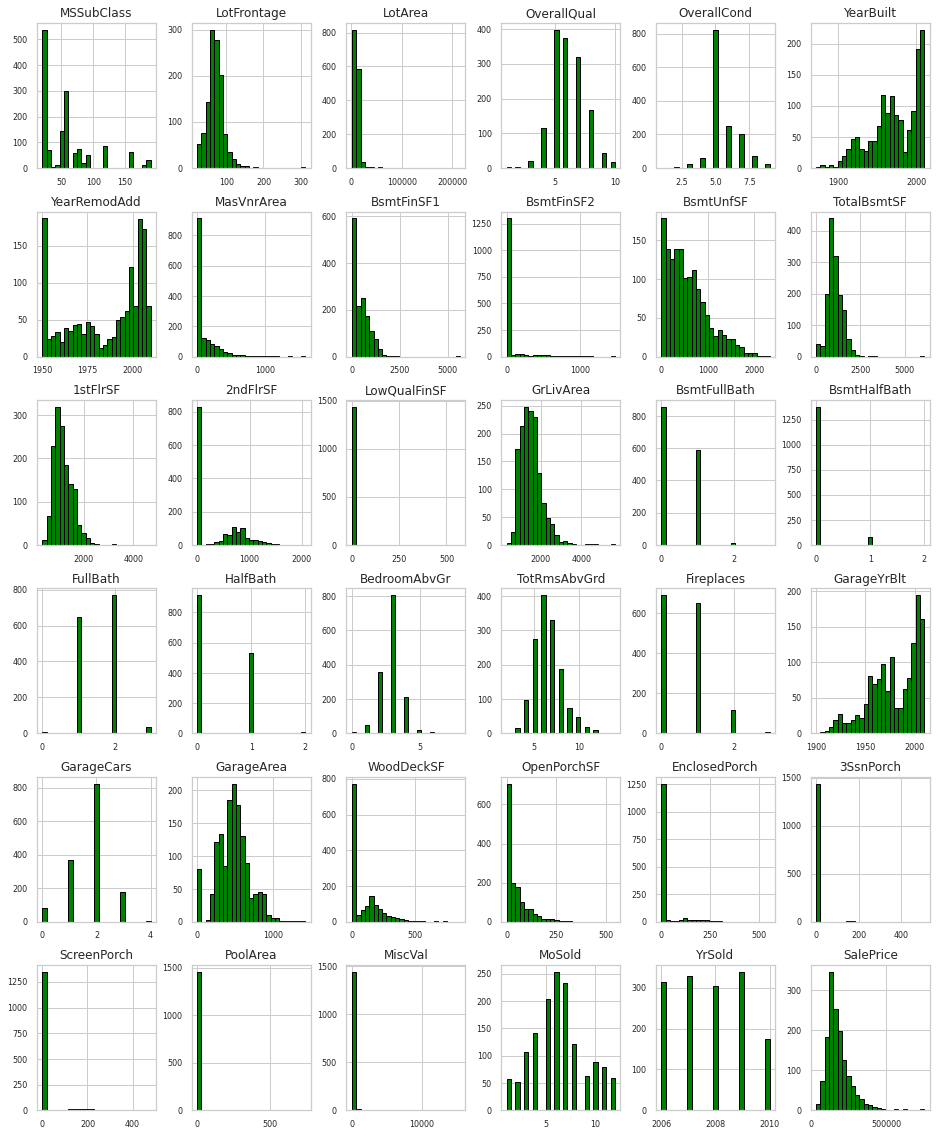

In [ ]:
# Distribusi semua plot data numerikal 
gambar = data_train_num.hist(
    figsize=(16, 20), 
    bins=25, 
    color="green", 
    edgecolor="black", 
    xlabelsize=8, 
    ylabelsize=8
)

In [ ]:
# Tentukan korelasi matrix
korelasi_matriks = data_train_num.corr()
korelasi_matriks

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [ ]:
# Ganti korelasi kurang dari |0.3| dengan '0' supaya lebih baik dalam visual
korelasi_matriks[(korelasi_matriks < 0.3) & (korelasi_matriks > -0.3)] = 0
korelasi_matriks

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
LotFrontage,-0.386347,1.000000,0.426095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.351799
LotArea,0.000000,0.426095,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
OverallQual,0.000000,0.000000,0.000000,1.000000,0.000000,0.572323,0.550684,0.411876,0.000000,0.0,...,0.000000,0.308819,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.790982
OverallCond,0.000000,0.000000,0.000000,0.000000,1.000000,-0.375983,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
YearBuilt,0.000000,0.000000,0.000000,0.572323,-0.375983,1.000000,0.592855,0.315707,0.000000,0.0,...,0.000000,0.000000,-0.387268,0.0,0.0,0.0,0.0,0.0,0.0,0.522897
YearRemodAdd,0.000000,0.000000,0.000000,0.550684,0.000000,0.592855,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.507101
MasVnrArea,0.000000,0.000000,0.000000,0.411876,0.000000,0.315707,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.477493
BsmtFinSF1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.386420
BsmtFinSF2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
# Tandai nilai yang lebih dari 0.3 
topeng = np.triu(np.ones_like(korelasi_matriks, dtype=bool)) 
topeng

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

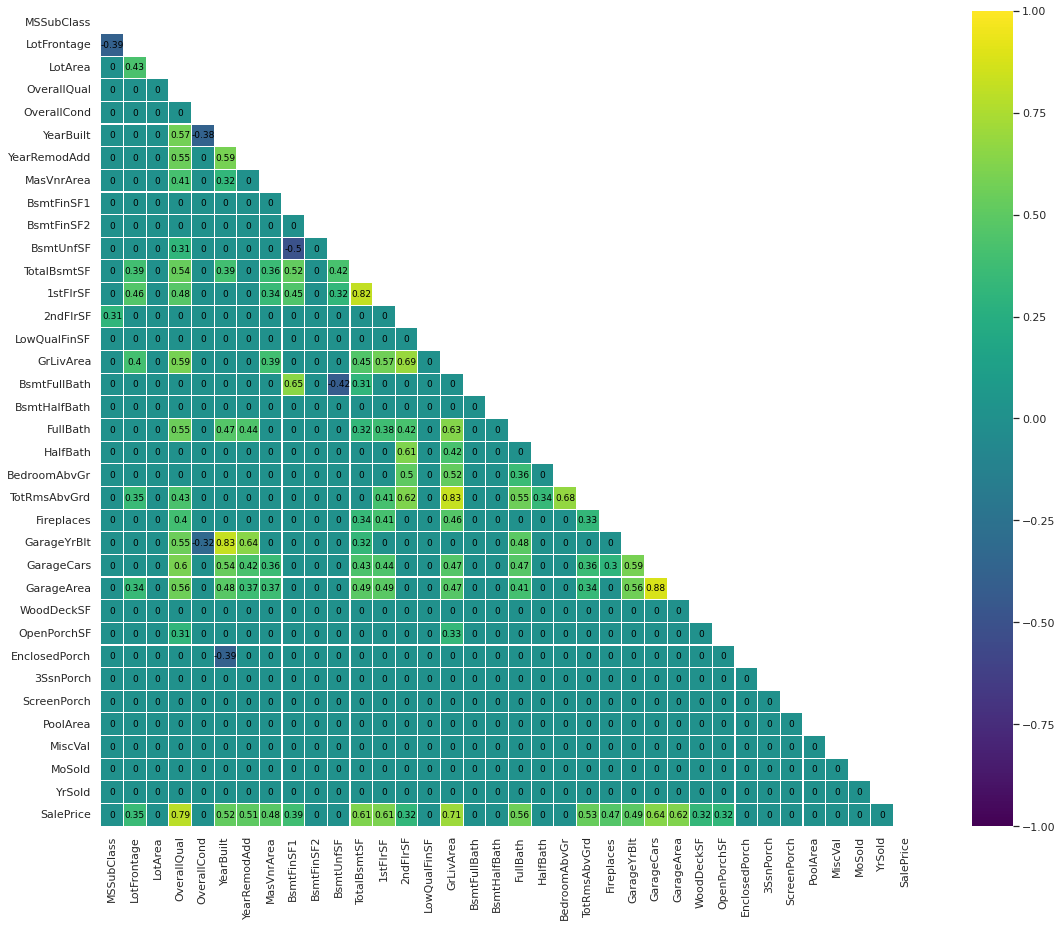

In [ ]:
# Pilih warna map
cmap = "viridis"

# Plotkan map panas
sns.heatmap( 
    data = korelasi_matriks, 
    mask = topeng, # cover, tidak menunjukkan nilai yang True
    vmax = 1.0, 
    vmin = -1.0, 
    linewidths = 0.1,
    annot_kws = {
        "size": 9, 
        "color": "black"
    }, 
    square = True, 
    cmap = cmap, 
    annot = True
);

In [ ]:
# Pilih fitur yang dimana korelasinya dengan 'SalePrice' lebih besar dari |0.3|
# -1 karena tidak termasuk 'SalePrice'
data_num_kor = data_train_num.corr()["SalePrice"][:-1]

# Korelasi kuat (r2 > 0.5)
daftar_kor_kuat = data_num_kor[abs(data_num_kor) >= 0.5].sort_values(ascending=False)
print(f"{len(daftar_kor_kuat)} Korelasi kuat dengan SalePrice:\n{daftar_kor_kuat}\n")

# Korelasi lemah (0.3 < r2 < 0.5)
daftar_kor_lemah = data_num_kor[(abs(data_num_kor) < 0.5) & (abs(data_num_kor) >= 0.3)].sort_values(ascending=False)
print(f"{len(daftar_kor_lemah)} Korelasi lemah dengan SalePrice:\n{daftar_kor_lemah}")

10 Korelasi kuat dengan SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

8 Korelasi lemah dengan SalePrice:
GarageYrBlt    0.486362
MasVnrArea     0.477493
Fireplaces     0.466929
BsmtFinSF1     0.386420
LotFrontage    0.351799
WoodDeckSF     0.324413
2ndFlrSF       0.319334
OpenPorchSF    0.315856
Name: SalePrice, dtype: float64


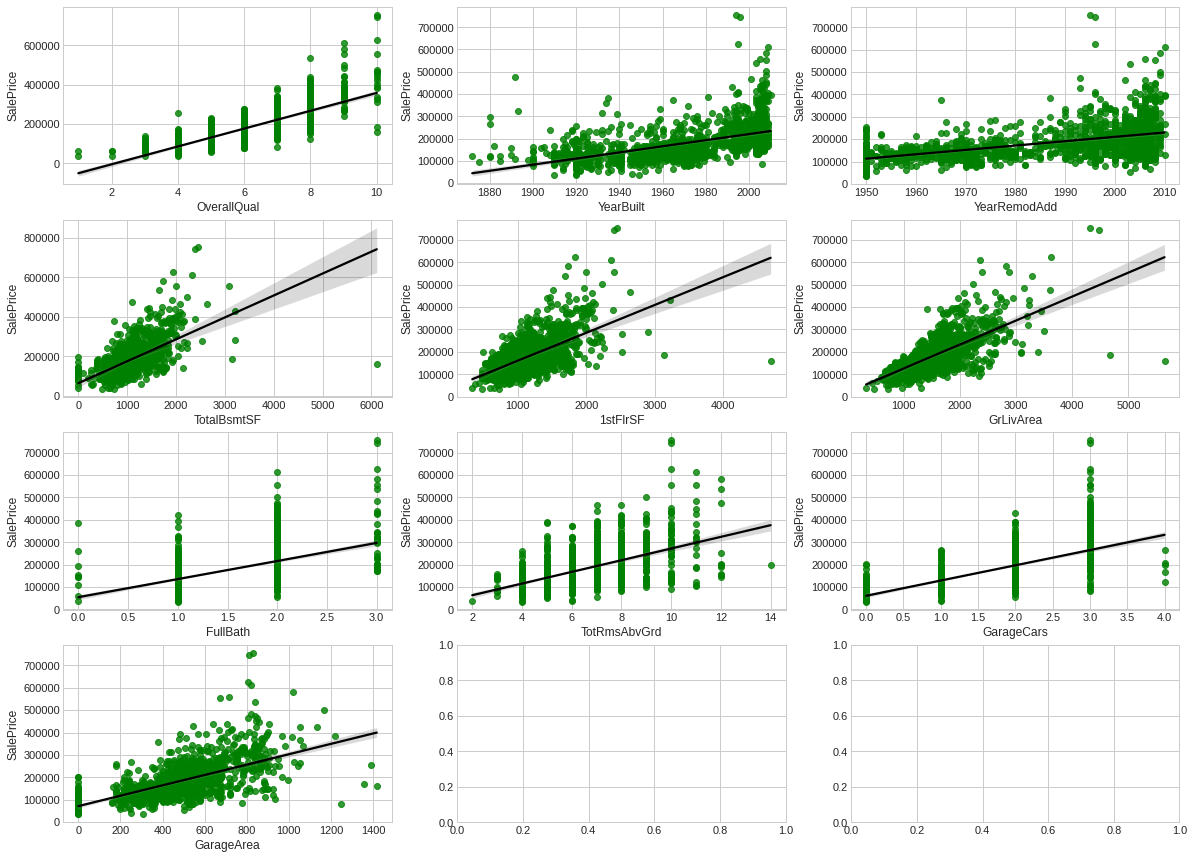

In [ ]:
# Fitur korelasi kuat (higher than 0.5)
fitur_kor_kuat = data_num_kor[abs(data_num_kor) >= 0.5].index.tolist()
fitur_kor_kuat.append("SalePrice")

data_fitur_kor_kuat = data_train_num.loc[:, fitur_kor_kuat]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(fitur_kor_kuat) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(fitur_kor_kuat)-1:
        sns.regplot(
            x=fitur_kor_kuat[i], 
            y="SalePrice", 
            data=data_fitur_kor_kuat, 
            ax=ax, 
            scatter_kws= {"color": "green"}, 
            line_kws={"color": "black"}
        )

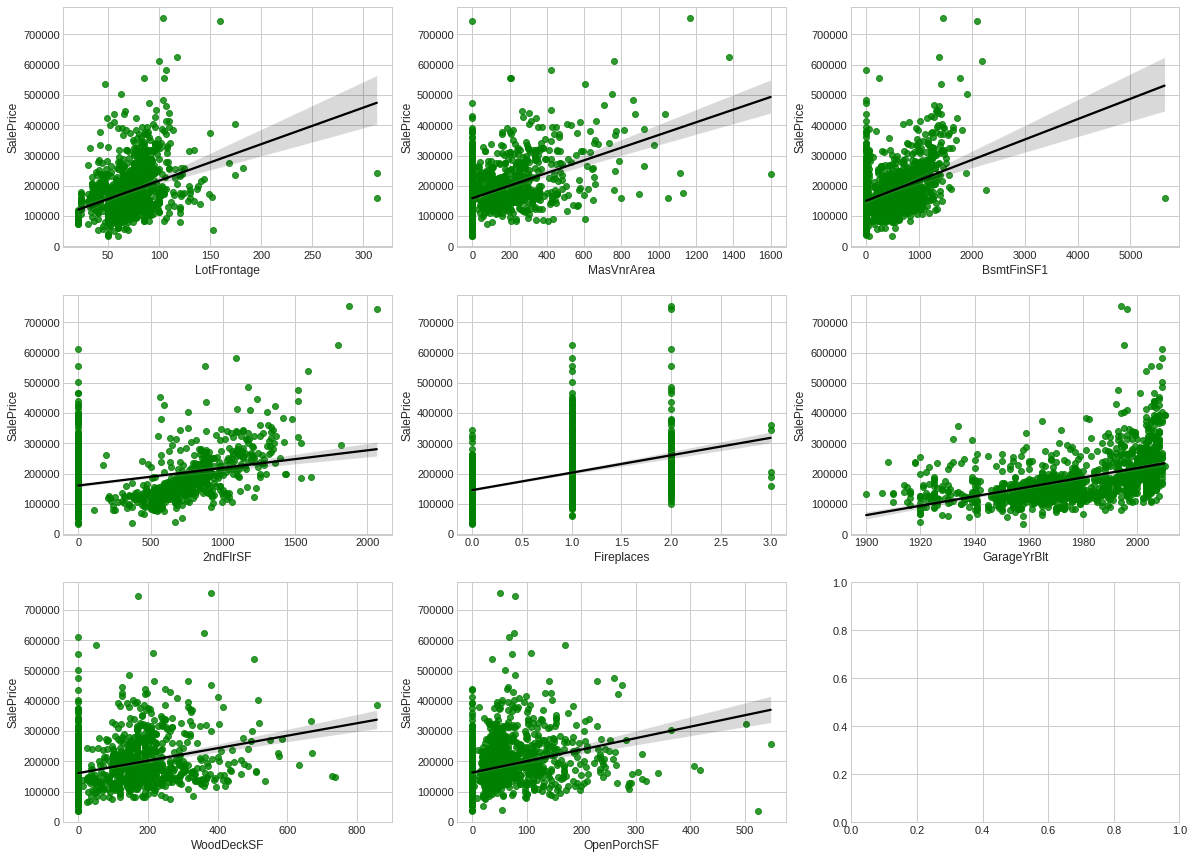

In [ ]:
# Fitur korelasi lemah (antara 0.3 - 0.5)

fitur_kor_lemah = data_num_kor[(abs(data_num_kor) >= 0.3) & (abs(data_num_kor) < 0.5)].index.tolist()
fitur_kor_lemah.append("SalePrice")

data_fitur_kor_lemah = data_train_num.loc[:, fitur_kor_lemah]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(fitur_kor_lemah) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(fitur_kor_lemah)-1:
        sns.regplot(
            x=fitur_kor_lemah[i], 
            y="SalePrice", 
            data=data_fitur_kor_lemah, 
            ax=ax, 
            scatter_kws= {"color": "green"}, 
            line_kws={"color": "black"}
        )

In [ ]:
# Tentukan daftar fitur numerikal yang akan disimpan
daftar_fitur_num = fitur_kor_kuat[:-1] + fitur_kor_lemah

# Pilih bentuk fitur ke data_train
data_train_num = data_train_num.loc[:, daftar_fitur_num]

# Pilih bentuk fitur ke data_test (-1 -> kecuali 'SalePrice')
data_test_num = data_test.loc[:, daftar_fitur_num[:-1]]

daftar_fitur_num

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 '2ndFlrSF',
 'Fireplaces',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

### I.2.2 Fitur data numerikal yang hilang

#### Train Set

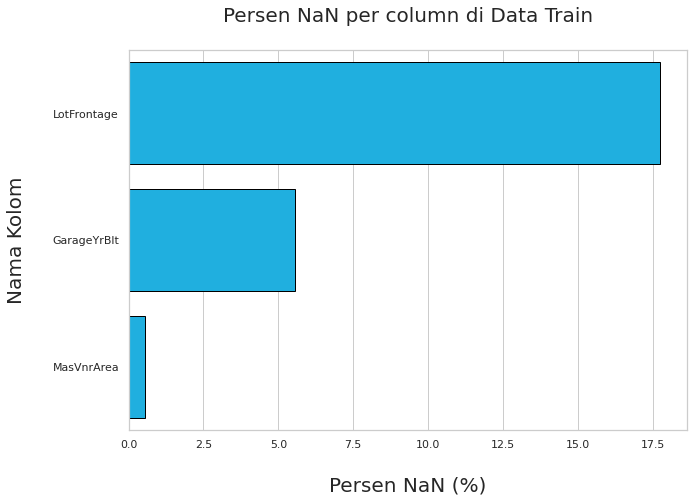

In [ ]:
# Cek 'NaN' dalam persen di tiap kolom data_train
kolom_dengan_nan = data_train_num.columns[data_train_num.isnull().any()]
nama_kolom = []
persen_nan = []

for i in kolom_dengan_nan:
    nama_kolom .append(i)
    persen_nan.append(round(data_train_num[i].isnull().sum()*100/len(data_train_num), 2))

tab = pd.DataFrame(nama_kolom , columns=["Column"])
tab["Percent_NaN"] = persen_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")

p.set_title("Persen NaN per column di Data Train\n", fontsize=20)
p.set_xlabel("\nPersen NaN (%)", fontsize=20)
p.set_ylabel("Nama Kolom\n", fontsize=20);

In [ ]:
# Imputasi nilai hilang (NaNs) dengan SimpleImputer
imputerku = SimpleImputer(strategy="median")
data_train_imputed = pd.DataFrame(imputerku.fit_transform(data_train_num))
data_train_imputed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,7.0,2003.0,2003.0,856.0,856.0,1710.0,2.0,8.0,2.0,548.0,65.0,196.0,706.0,854.0,0.0,2003.0,0.0,61.0,208500.0
1,6.0,1976.0,1976.0,1262.0,1262.0,1262.0,2.0,6.0,2.0,460.0,80.0,0.0,978.0,0.0,1.0,1976.0,298.0,0.0,181500.0
2,7.0,2001.0,2002.0,920.0,920.0,1786.0,2.0,6.0,2.0,608.0,68.0,162.0,486.0,866.0,1.0,2001.0,0.0,42.0,223500.0
3,7.0,1915.0,1970.0,756.0,961.0,1717.0,1.0,7.0,3.0,642.0,60.0,0.0,216.0,756.0,1.0,1998.0,0.0,35.0,140000.0
4,8.0,2000.0,2000.0,1145.0,1145.0,2198.0,2.0,9.0,3.0,836.0,84.0,350.0,655.0,1053.0,1.0,2000.0,192.0,84.0,250000.0


In [ ]:
data_train_imputed.columns = data_train_num.columns
data_train_imputed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,LotFrontage,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,SalePrice
0,7.0,2003.0,2003.0,856.0,856.0,1710.0,2.0,8.0,2.0,548.0,65.0,196.0,706.0,854.0,0.0,2003.0,0.0,61.0,208500.0
1,6.0,1976.0,1976.0,1262.0,1262.0,1262.0,2.0,6.0,2.0,460.0,80.0,0.0,978.0,0.0,1.0,1976.0,298.0,0.0,181500.0
2,7.0,2001.0,2002.0,920.0,920.0,1786.0,2.0,6.0,2.0,608.0,68.0,162.0,486.0,866.0,1.0,2001.0,0.0,42.0,223500.0
3,7.0,1915.0,1970.0,756.0,961.0,1717.0,1.0,7.0,3.0,642.0,60.0,0.0,216.0,756.0,1.0,1998.0,0.0,35.0,140000.0
4,8.0,2000.0,2000.0,1145.0,1145.0,2198.0,2.0,9.0,3.0,836.0,84.0,350.0,655.0,1053.0,1.0,2000.0,192.0,84.0,250000.0


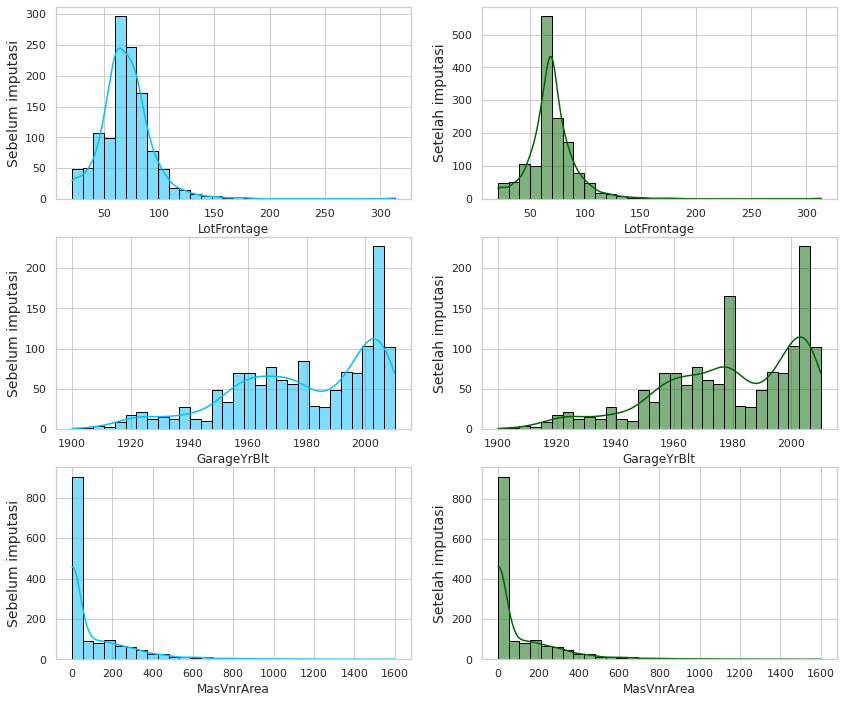

In [ ]:
# Cek tiap distribusi sebelum diimputasi dan setelah imputasi

# Tentukan parameter
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2)

# Plot the results
for feature, fig_pos in zip(["LotFrontage", "GarageYrBlt", "MasVnrArea"], [0, 1, 2]):

    """Features distribution before and after imputation"""

    # sebelum imputasi
    p = sns.histplot(ax=axes[fig_pos, 0], x=data_train_num[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_ylabel(f"Sebelum imputasi", fontsize=14)

    # stelah imputasi
    q = sns.histplot(ax=axes[fig_pos, 1], x=data_train_imputed[feature],
                     kde=True, bins=30, color="darkgreen", edgecolor="black")
    q.set_ylabel(f"Setelah imputasi", fontsize=14)

In [ ]:
# Hilangkan 'LotFrontage' dan 'GarageYrBlt'
data_train_imputed.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)
data_train_imputed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,SalePrice
0,7.0,2003.0,2003.0,856.0,856.0,1710.0,2.0,8.0,2.0,548.0,196.0,706.0,854.0,0.0,0.0,61.0,208500.0
1,6.0,1976.0,1976.0,1262.0,1262.0,1262.0,2.0,6.0,2.0,460.0,0.0,978.0,0.0,1.0,298.0,0.0,181500.0
2,7.0,2001.0,2002.0,920.0,920.0,1786.0,2.0,6.0,2.0,608.0,162.0,486.0,866.0,1.0,0.0,42.0,223500.0
3,7.0,1915.0,1970.0,756.0,961.0,1717.0,1.0,7.0,3.0,642.0,0.0,216.0,756.0,1.0,0.0,35.0,140000.0
4,8.0,2000.0,2000.0,1145.0,1145.0,2198.0,2.0,9.0,3.0,836.0,350.0,655.0,1053.0,1.0,192.0,84.0,250000.0


#### Test Set

In [ ]:
# Drop the same features from test set as for the train set
data_test_num.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)

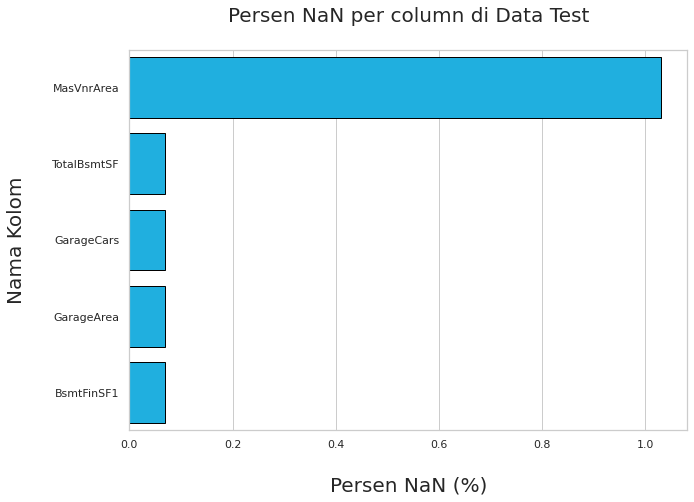

In [ ]:
# Cek 'NaN' dalam persen di tiap kolom data_test
kolom_dengan_nan = data_test_num.columns[data_test_num.isnull().any()]
nama_kolom = []
persen_nan = []

for i in kolom_dengan_nan:
    nama_kolom .append(i)
    persen_nan.append(round(data_test_num[i].isnull().sum()*100/len(data_test_num), 2))

tab = pd.DataFrame(nama_kolom , columns=["Column"])
tab["Percent_NaN"] = persen_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")

p.set_title("Persen NaN per column di Data Test\n", fontsize=20)
p.set_xlabel("\nPersen NaN (%)", fontsize=20)
p.set_ylabel("Nama Kolom\n", fontsize=20);

In [ ]:
# Imputasi nilai hilang (NaNs) dengan SimpleImputer
imputerku = SimpleImputer(strategy="median")
data_test_imputed = pd.DataFrame(imputerku.fit_transform(data_test_num))
data_test_imputed.columns = data_test_num.columns

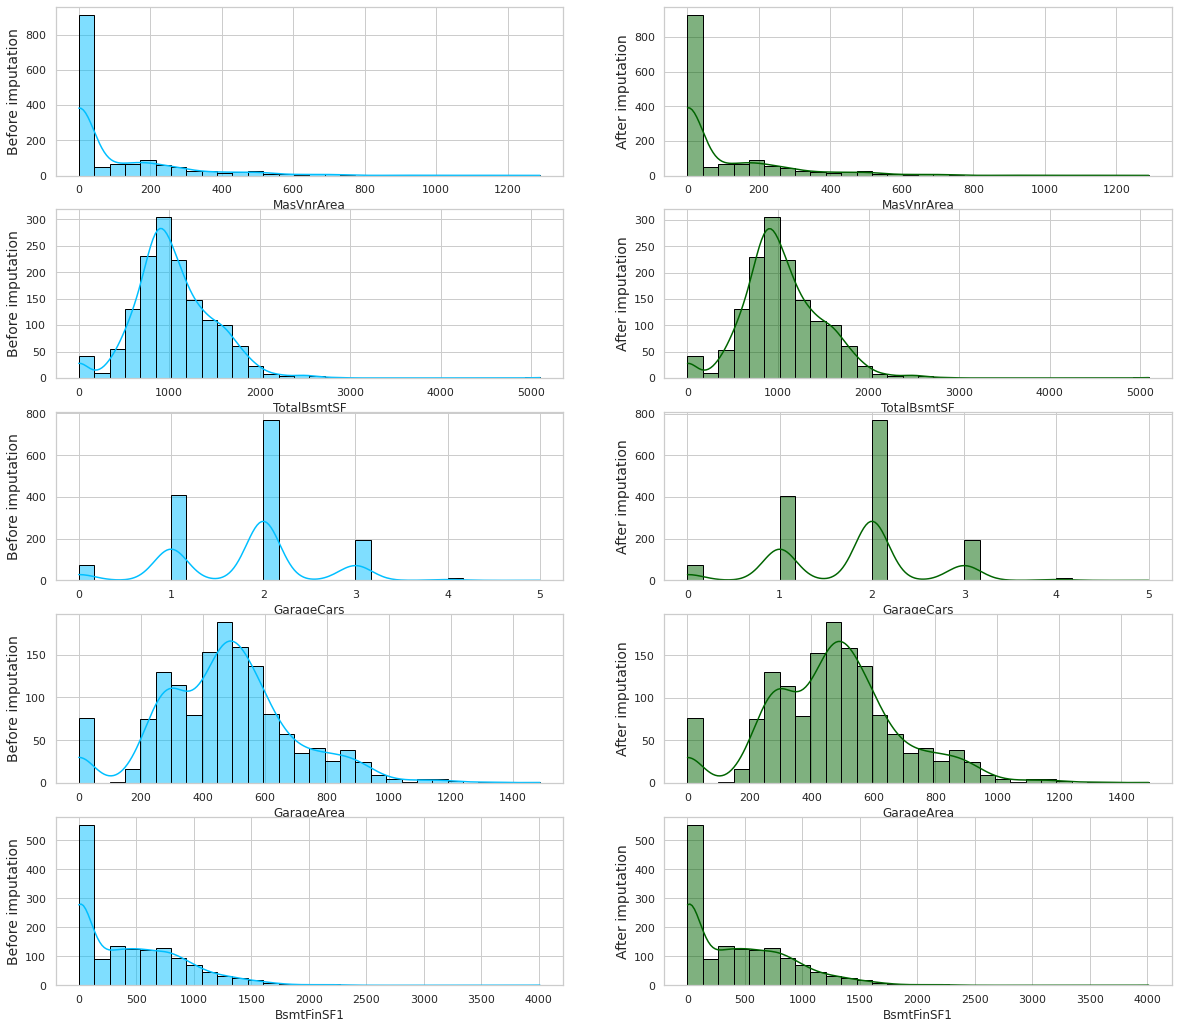

In [ ]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2)

# Plot the results
for feature, fig_pos in zip(tab["Column"].tolist(), range(0, 6)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=data_test_num[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=data_test_imputed[feature],
                     kde=True, bins=30, color="darkgreen", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)

## I.3 Fitur Kategorikal

### I.3.1 Explore and clean fitur kategorikal

In [ ]:
# Categorical to Quantitative relationship

# categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"] # -->list comprehension

# for-loop 
fitur_kategorikal = []
for feat, feat_type in zip(data_train.columns, data_train.dtypes):
    if feat_type == 'object':
       fitur_kategorikal.append(feat)

# Include target variable
fitur_kategorikal.append("SalePrice")

# Train set
data_train_kateg = data_train[fitur_kategorikal]

# Test set (-1 because test set don't have 'Sale Price')
data_test_kateg = data_test[fitur_kategorikal[:-1]]

data_test_kateg.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


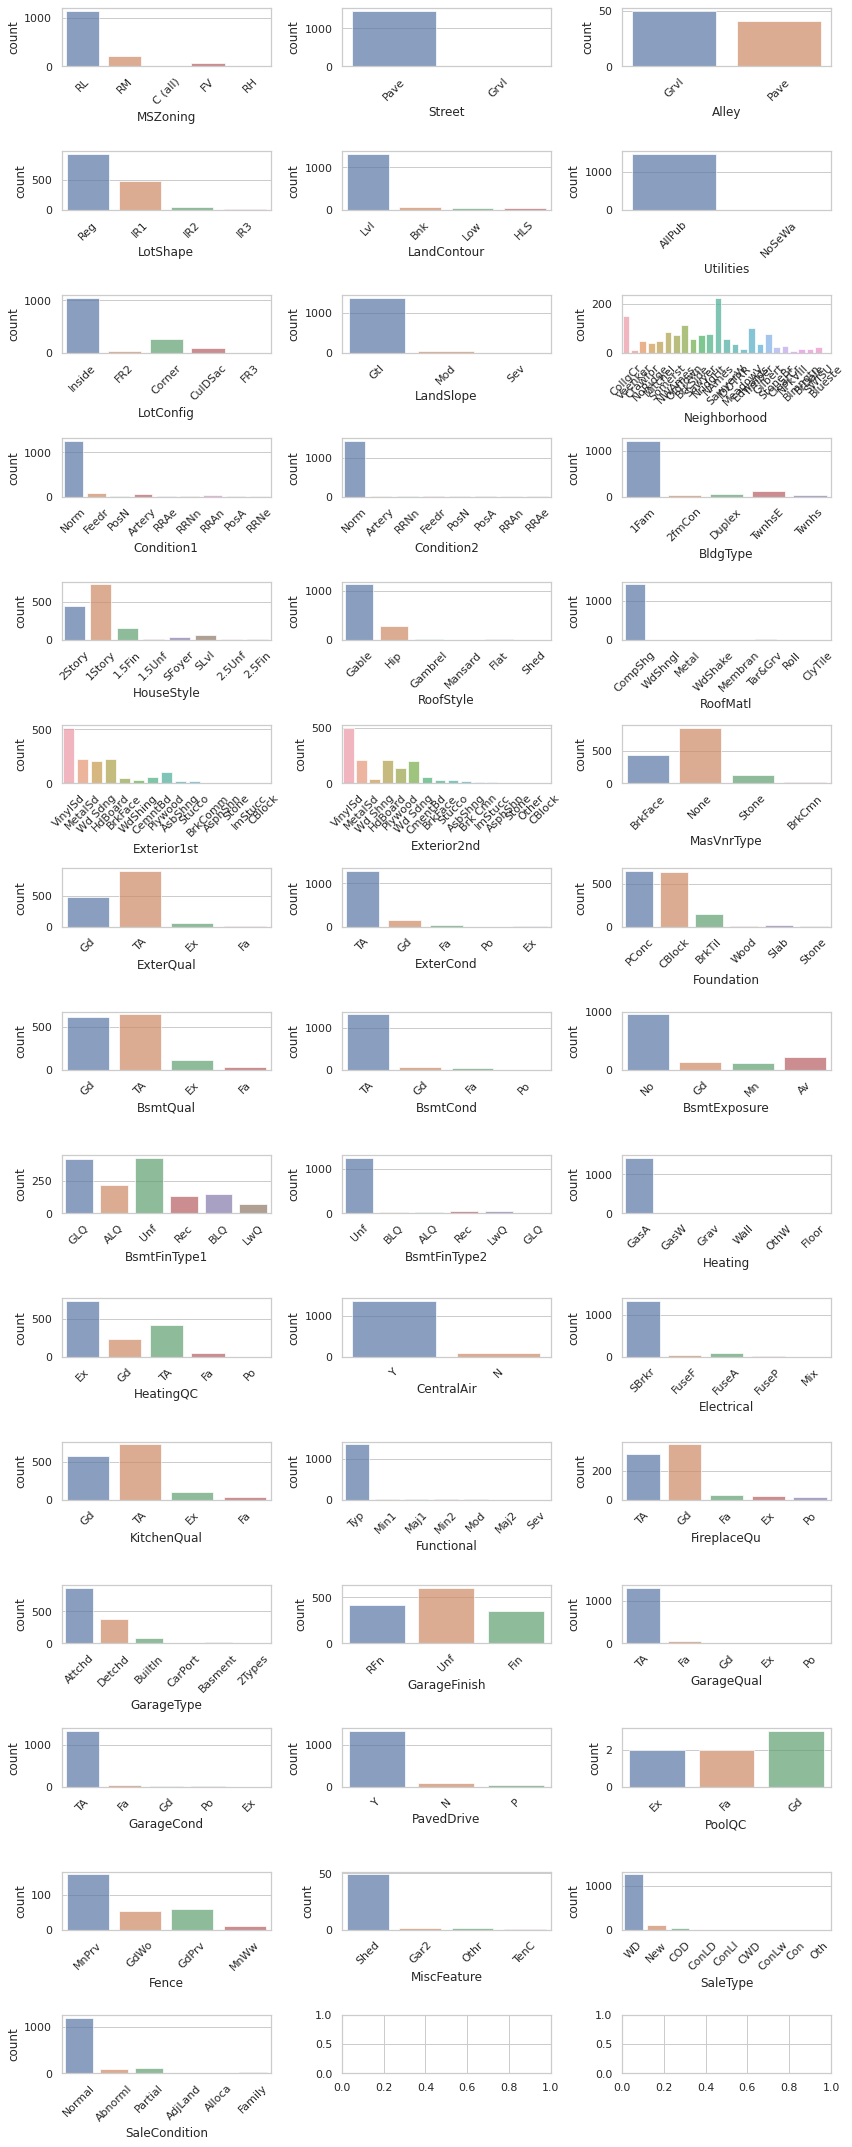

In [ ]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(
    round(len(data_train_kateg.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(data_train_kateg.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=data_train_kateg.columns[i], alpha=0.7, data=data_train_kateg, ax=ax)

fig.tight_layout()

In [ ]:
# Drop some categorical 'non-informative' features from train set
kolom_hilang = ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 
                   'CentralAir', 'BsmtFinType2', 'Heating', 'Functional','GarageQual', 'GarageCond', 
                   'ExterCond','MiscFeature', 'PavedDrive', 'SaleType']

In [ ]:
# Train set
data_train_kateg.drop(kolom_hilang, axis=1, inplace=True)

# Test set
data_test_kateg.drop(kolom_hilang, axis=1, inplace=True)

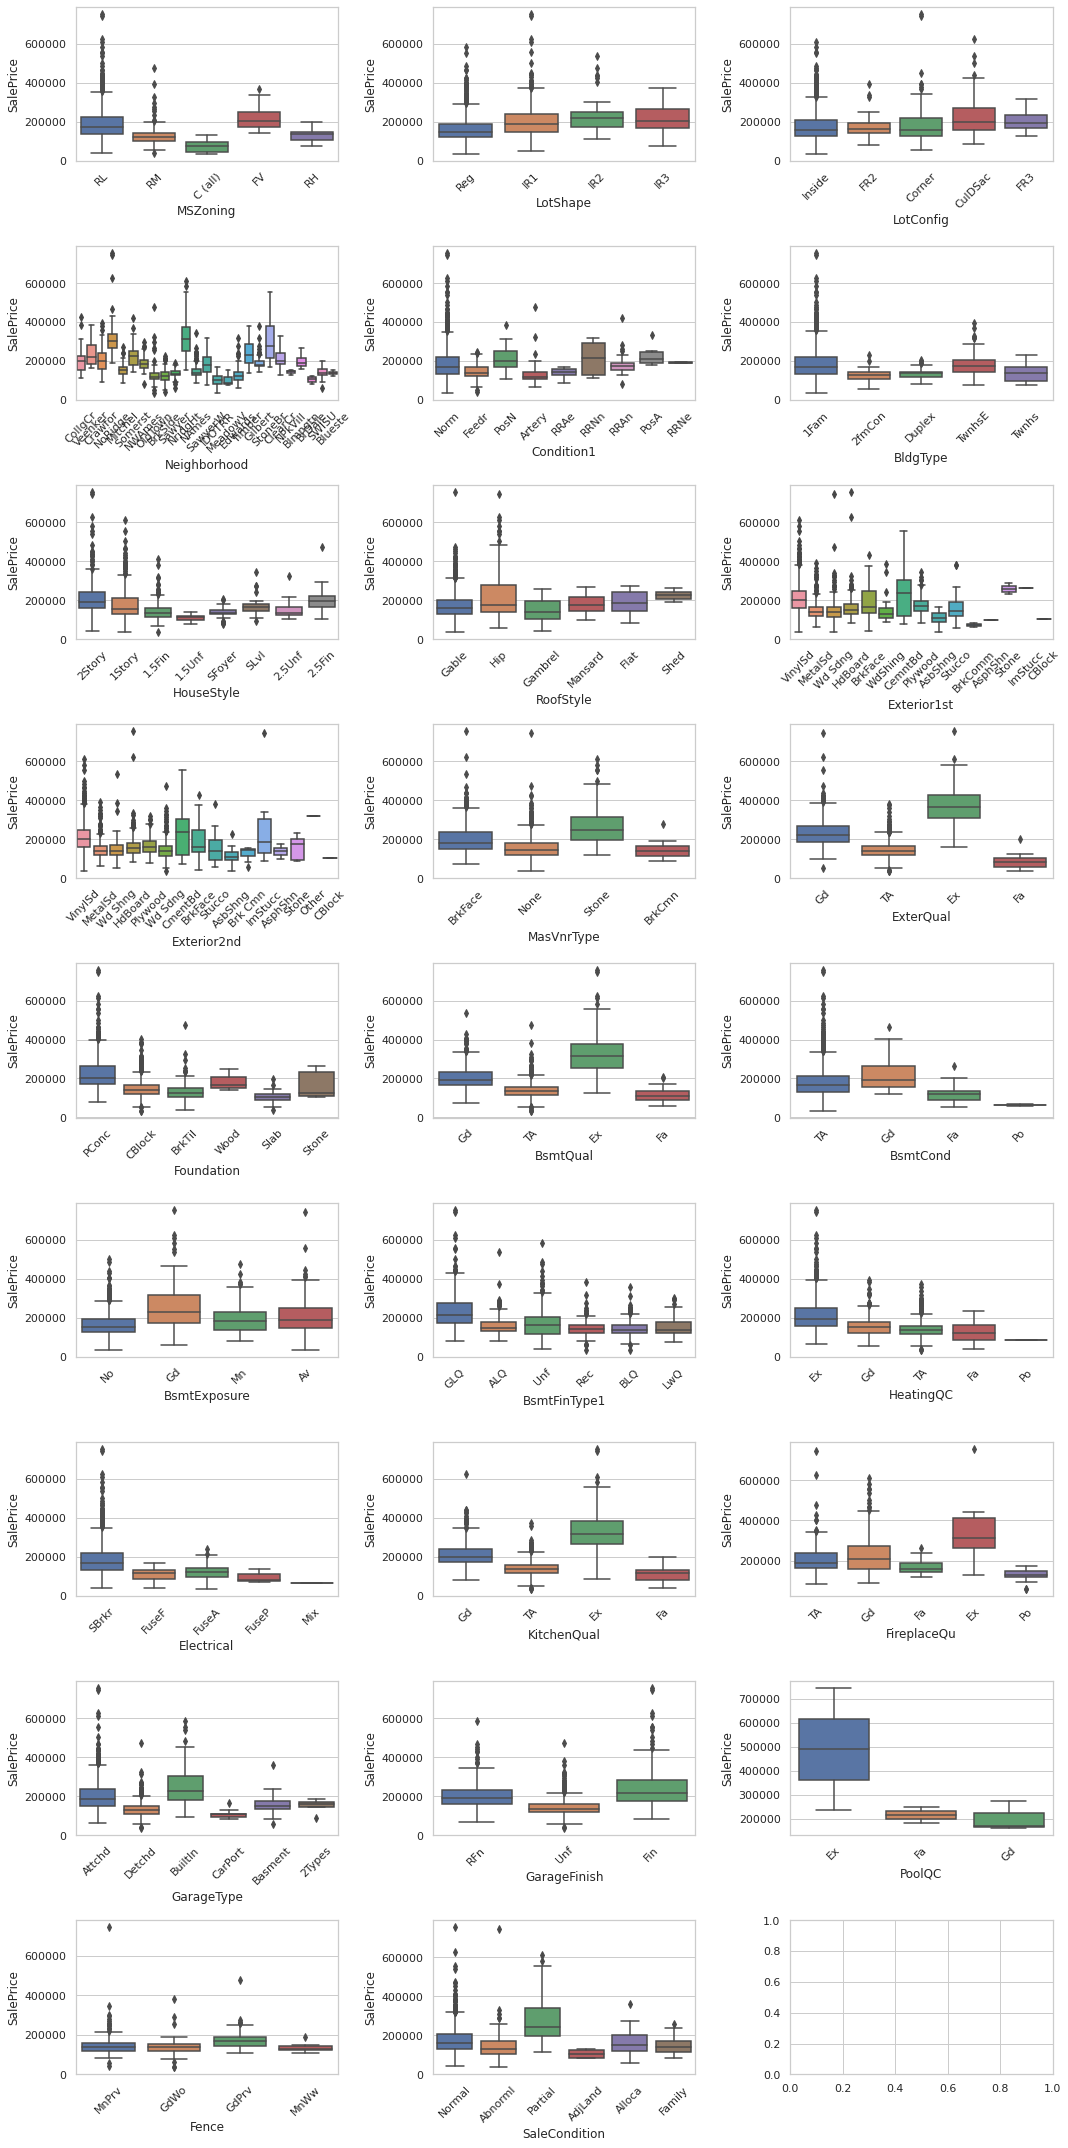

In [ ]:
# With the boxplot we can see the variation of the target 'SalePrice' in each of the categorical features
fig, axes = plt.subplots(
    round(len(data_train_kateg.columns)/3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(data_train_kateg.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(
            x=data_train_kateg.columns[i], y="SalePrice", data=data_train_kateg, ax=ax)

fig.tight_layout()

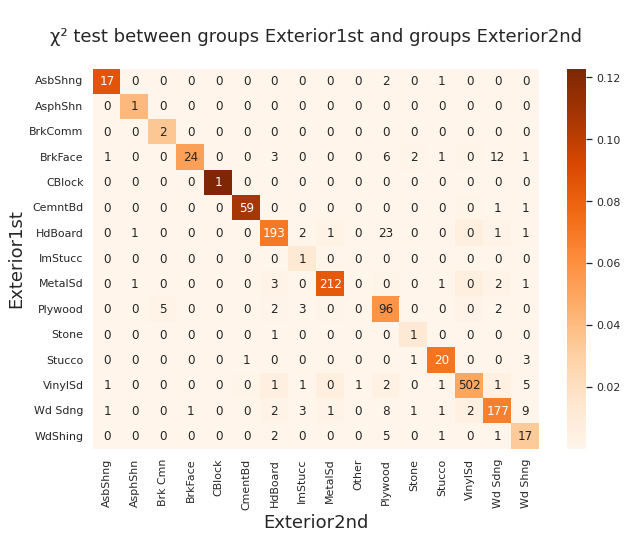

P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0



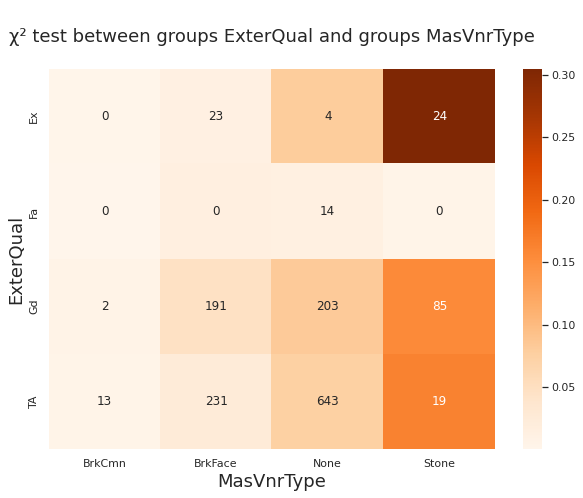

P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.0187554679218715e-54



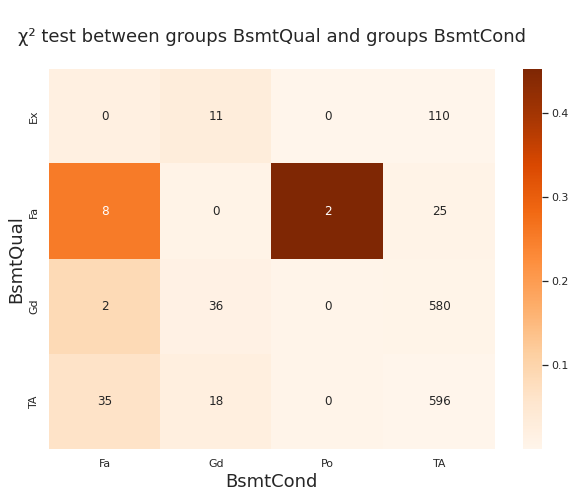

P-Value of the ChiSq Test bewteen BsmtQual and BsmtCond is: 1.9371809126533347e-31



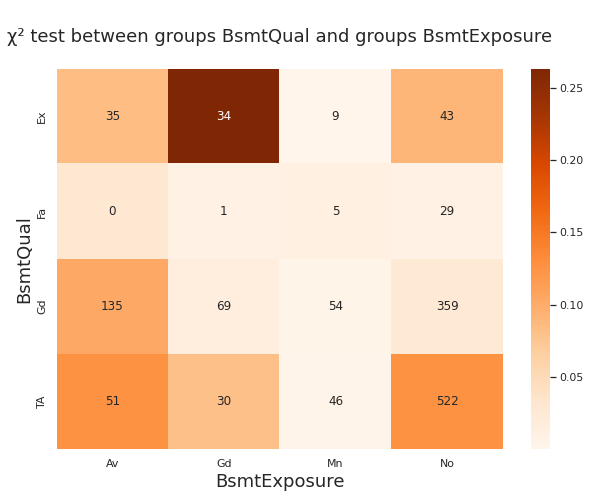

P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32



In [ ]:
# Plot contingency table

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual", "BsmtQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtCond", "BsmtExposure"]

for i, j in zip(X, Y):

    # Contingency table
    cont = data_train_kateg[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(data_train_kateg)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=data_train_kateg[i], columns=data_train_kateg[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(
        f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")

In [ ]:
# Let's drop the one of each co-dependent variables
# Train set
data_train_kateg.drop(Y, axis=1, inplace=True)

# Test set
data_test_kateg.drop(Y, axis=1, inplace=True)

### I.3.2 Fitur Missing Kategorical 

#### Train Set

In [ ]:
# Drop the same features from test set as for the train set
data_test_kateg.drop(["PoolQC", "Fence", "FireplaceQu",
                    "GarageType", "GarageFinish"], axis=1, inplace=True,)

Text(0, 0.5, 'Column Name\n')

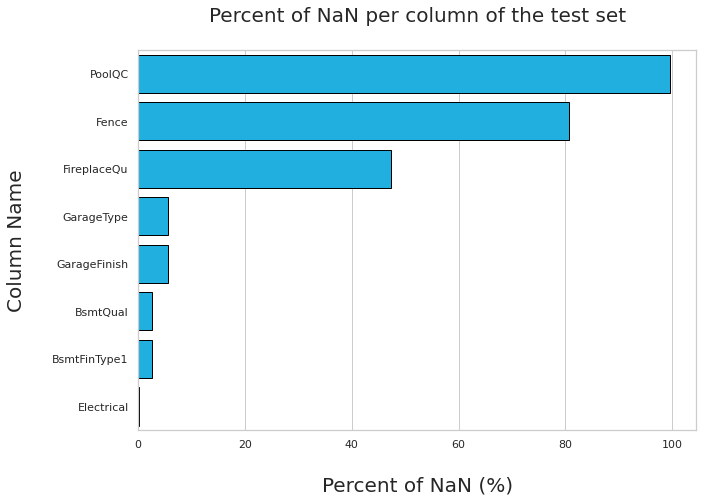

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = data_train_kateg.columns[data_train_kateg.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(data_train_kateg[i].isnull().sum() * 100 / len(data_train_kateg), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
# Drop the features where the percentage of NaN is higher than 5%
data_train_kateg.drop(["PoolQC", "Fence", "FireplaceQu", "GarageType", "GarageFinish"], 
                    axis=1, inplace=True)

In [ ]:
# Fill the NaN of each feature by the corresponding modal class
kateg_isi_null = {"BsmtQual": data_train_kateg["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": data_train_kateg["BsmtFinType1"].mode().iloc[0],
                   "Electrical": data_train_kateg["Electrical"].mode().iloc[0]}

data_train_kateg = data_train_kateg.fillna(value=kateg_isi_null)

### I.3.3 Transform fitur kategorikal ke fitur binary (get_dummies)

In [ ]:
# Train set
for i in data_train_kateg.columns.tolist()[:-1]:
    data_dummies = pd.get_dummies(data_train_kateg[i], prefix=i)

    # merge both tables
    data_train_kateg = data_train_kateg.join(data_dummies)

# Select the binary features only
data_train_binary = data_train_kateg.iloc[:, 18:]
data_train_binary.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Test set
for i in data_test_kateg.columns.tolist():
    data_dummies = pd.get_dummies(data_test_kateg[i], prefix=i)

    # merge both tables
    data_test_kateg = data_test_kateg.join(data_dummies)

# Select the binary features only
data_test_binary = data_test_kateg.iloc[:, 17:]
data_test_binary.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Let's check if the column headings are the same in both data set, df_train and df_test
dif_1 = [x for x in data_train_binary.columns if x not in data_test_binary.columns]
print(
    f"Fitur yang ada di data_train_kateg dan tidak ada di data_test_kateg: {dif_1}\n")

dif_2 = [x for x in data_test_binary.columns if x not in data_train_binary.columns]
print(
    f"Fitur yang ada di data_test_kateg dan tidak ada di data_train_kateg: {dif_2}")

Fitur yang ada di data_train_kateg dan tidak ada di data_test_kateg: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Electrical_Mix']

Fitur yang ada di data_test_kateg dan tidak ada di data_train_kateg: []


In [ ]:
# Let's drop these columns from df_train_binary
data_train_binary.drop(dif_1, axis=1, inplace=True)

# Check again if the column headings are the same in both data set
dif_1 = [x for x in data_train_binary.columns if x not in data_test_binary.columns]
print(
    f"Fitur yang ada di data_train_kateg dan tidak ada di data_test_kateg: {dif_1}\n")

dif_2 = [x for x in data_test_binary.columns if x not in data_train_binary.columns]
print(
    f"Fitur yang ada di data_test_kateg dan tidak ada di data_train_kateg: {dif_2}")

Fitur yang ada di data_train_kateg dan tidak ada di data_test_kateg: []

Fitur yang ada di data_test_kateg dan tidak ada di data_train_kateg: []


## I.4 Gabungkan fitur numerical dan binary ke dalam data set

In [ ]:
# Add binary features to numreical features
# Train set
data_train_baru = data_train_imputed.join(data_train_binary)
print(f"Train set: {data_train_baru.shape}")

# Test set
data_test_baru = data_test_imputed.join(data_test_binary)
print(f"Test set: {data_test_baru.shape}")

Train set: (1460, 135)
Test set: (1459, 134)


In [ ]:
# Let's handle the outliers in "GrLivArea", "TotalBsmtSF" and "GarageArea"
# Outliers in "GrLivArea"
outliers1 = data_train_baru[(data_train_baru["GrLivArea"] > 4000) & (
    data_train_baru["SalePrice"] <= 200000)].index.tolist()

# Outliers in "TotalBsmtSF"
outliers2 = data_train_baru[(data_train_baru["TotalBsmtSF"] > 3000) & (
    data_train_baru["SalePrice"] <= 400000)].index.tolist()

# Outliers in "GarageArea"
outliers3 = data_train_baru[(data_train_baru["GarageArea"] > 1200) & (
    data_train_baru["SalePrice"] <= 300000)].index.tolist()

# List of all the outliers
outliers = outliers1 + outliers2 + outliers3
outliers = list(set(outliers))
print(outliers)

# Drop these outlier
data_train_baru = data_train_baru.drop(data_train_baru.index[outliers])

# Reset index
data_train_baru = data_train_baru.reset_index().drop("index", axis=1)

[1061, 581, 1190, 523, 332, 1298]


## II Fitur Engineering

In [ ]:
# Define a function to calculate the occupancy rate of the first floor of the total living area


def floor_occupation(x):
    """First floor occupation of the total live area

    floor_occupation equation has the following form:
    (1st Floor Area * 100) / (Ground Live Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Ground Live Area = 0
        equation -- if Ground Live Area > 0
    """
    if x["GrLivArea"] == 0:
        return 0
    else:
        return x["1stFlrSF"] * 100 / x["GrLivArea"]


# Apply the function on train and test set
data_train_baru["1stFlrPercent"] = data_train_baru.apply(
    lambda x: floor_occupation(x), axis=1)

data_test_baru["1stFlrPercent"] = data_test_baru.apply(
    lambda x: floor_occupation(x), axis=1)

# Drop "1stFlrSF" and "2ndFlrSF"
data_train_baru.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)
data_test_baru.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)

In [ ]:
# Define a function to calculate the occupancy rate of the finished basement area


def bsmt_finish(x):
    """Propotion of finished area in basement 

    bsmt_finish equation has the following form:
    (Finished Basement Area * 100) / (Total Basement Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Total Basement Area = 0
        equation -- if Total Basement Area > 0
    """
    if x["TotalBsmtSF"] == 0:
        return 0
    else:
        return x["BsmtFinSF1"] * 100 / x["TotalBsmtSF"]


# Apply the function on train and test set
data_train_baru["BsmtFinPercent"] = data_train_baru.apply(
    lambda x: bsmt_finish(x), axis=1)

data_test_baru["BsmtFinPercent"] = data_test_baru.apply(
    lambda x: bsmt_finish(x), axis=1)

# Drop "BsmtFinSF1"
data_train_baru.drop(["BsmtFinSF1"], axis=1, inplace=True)
data_test_baru.drop(["BsmtFinSF1"], axis=1, inplace=True)

In [ ]:
# Convert Year of construction to Age of the house since the construction
data_train_baru["AgeSinceConst"] = data_train_baru["YearBuilt"].max() - data_train_baru["YearBuilt"]

data_test_baru["AgeSinceConst"] = data_test_baru["YearBuilt"].max() - data_test_baru["YearBuilt"]

# Drop "YearBuilt"
data_train_baru.drop(["YearBuilt"], axis=1, inplace=True)
data_test_baru.drop(["YearBuilt"], axis=1, inplace=True)

In [ ]:
data_train_baru["AgeSinceRemod"] = data_train_baru["YearRemodAdd"].max() - data_train_baru["YearRemodAdd"]

data_test_baru["AgeSinceRemod"] = data_test_baru["YearRemodAdd"].max() - data_test_baru["YearRemodAdd"]

# Drop "YearRemodAdd"
data_train_baru.drop(["YearRemodAdd"], axis=1, inplace=True)
data_test_baru.drop(["YearRemodAdd"], axis=1, inplace=True)

In [ ]:
continuous_features = ["OverallQual", "TotalBsmtSF", "GrLivArea",
                       "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea",
                       "MasVnrArea", "Fireplaces", "1stFlrPercent",
                       "BsmtFinPercent", "AgeSinceConst", "AgeSinceRemod"]
data_miring_verify = data_train_baru.loc[:, continuous_features]

In [ ]:
# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(data_miring_verify[i].skew()))

data_skewed = pd.DataFrame({"Columns": continuous_features,
                          "Abs_Skew": skew_ft})

fitur_condong = data_skewed[data_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"Daftar fitur condong: {fitur_condong}")

Daftar fitur condong: ['GrLivArea', 'TotRmsAbvGrd', 'MasVnrArea', 'Fireplaces', 'AgeSinceConst', 'AgeSinceRemod']


In [ ]:
# Log transformation of the skewed features
#sf_features = ["TotalBsmtSF", "GrLivArea", "MasVnrArea", "GarageArea"]

for i in fitur_condong:
    # loop over i (features) to calculate Log of surfaces
    # Train set
    data_train_baru[i] = np.log((data_train_baru[i])+1)
    
    # Test set
    data_test_baru[i] = np.log((data_test_baru[i])+1)

## III Prepare Data untuk modeling

### III.1Target Variable 'SalePrice'

Text(0, 0.5, '')

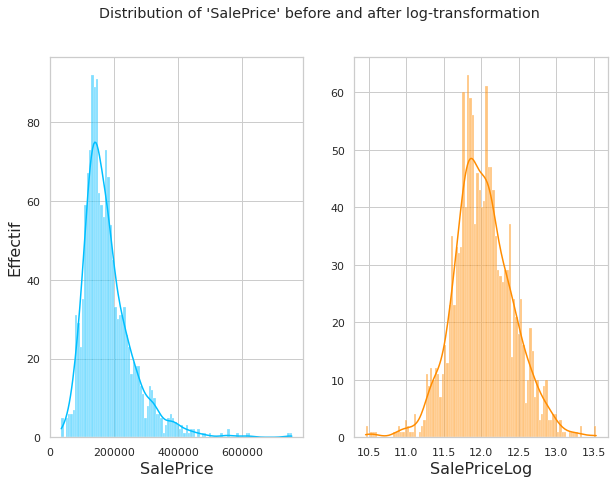

In [ ]:
# Log transformation of the target variable "SalePrice"
data_train_baru["SalePriceLog"] = np.log(data_train_baru.SalePrice)

# Plot the distribution before and after transformation
fig, axes = plt.subplots(1, 2)
fig.suptitle("Distribution of 'SalePrice' before and after log-transformation")

# before log transformation
p = sns.histplot(ax=axes[0], x=data_train_baru["SalePrice"],
                 kde=True, bins=100, color="deepskyblue")
p.set_xlabel("SalePrice", fontsize=16)
p.set_ylabel("Effectif", fontsize=16)

# after log transformation
q = sns.histplot(ax=axes[1], x=data_train_baru["SalePriceLog"],
                 kde=True, bins=100, color="darkorange")
q.set_xlabel("SalePriceLog", fontsize=16)
q.set_ylabel("", fontsize=16)

In [ ]:
# Drop the original SalePrice
data_train_baru.drop(["SalePrice"], axis=1, inplace=True)

### III.2 Split data into train and test set and Standardization

In [ ]:
# Extract the features (X) and the target (y)
# Features (X)
X = data_train_baru[[i for i in list(
    data_train_baru.columns) if i != "SalePriceLog"]]
print(X.shape)

# Target (y)
y = data_train_baru.loc[:, "SalePriceLog"]
print(y.shape)

(1454, 133)
(1454,)


In [ ]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins.
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y_binned, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1163, 133)
y_train:(1163,)

X_test:(291, 133)
y_test:(291,)


In [ ]:
# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
# The same standardization is applied for data_test_baru
data_test_baru = std_scale.transform(data_test_baru)


# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
data_test_baru = pd.DataFrame(data_test_baru, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

### III.3 Backward Stepwise Regression

In [ ]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

worst_feature : ExterQual_Fa, 0.9952229843789813 
worst_feature : Exterior1st_VinylSd, 0.9908261096246291 
worst_feature : Exterior1st_Stucco, 0.9912902950101788 
worst_feature : Neighborhood_SawyerW, 0.9802513527434837 
worst_feature : HeatingQC_Gd, 0.9796378141149371 
worst_feature : Condition1_RRAn, 0.9792582577485103 
worst_feature : TotRmsAbvGrd, 0.9534797447229055 
worst_feature : BsmtQual_Gd, 0.9462029293598475 
worst_feature : MasVnrArea, 0.937603280303654 
worst_feature : Neighborhood_NPkVill, 0.9329046901038235 
worst_feature : Exterior1st_AsphShn, 0.932021440844009 
worst_feature : Neighborhood_BrkSide, 0.9269767538213967 
worst_feature : Condition1_PosN, 0.8700005819607772 
worst_feature : ExterQual_TA, 0.8657355728867967 
worst_feature : BldgType_2fmCon, 0.8683562197876683 
worst_feature : BsmtFinType1_BLQ, 0.8505172227841485 
worst_feature : SaleCondition_Alloca, 0.8359746235076246 
worst_feature : Neighborhood_NAmes, 0.8321988910529518 
worst_feature : RoofStyle_Gable, 0

In [ ]:
# Keep the selected features only
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]
data_test_baru = data_test_baru.loc[:, Selected_Features[0]]

### III.4 Variance Inflation Factor

In [ ]:
# Here calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

# VIF results in a table
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,3.4,OverallQual
1,3.0,TotalBsmtSF
2,4.4,GrLivArea
3,2.3,FullBath
4,5.7,GarageCars
5,5.4,GarageArea
6,1.6,Fireplaces
7,1.2,WoodDeckSF
8,1.2,OpenPorchSF
9,1.4,MSZoning_C (all)


In [ ]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 10]["features"].tolist()

if len(high_vif_list) == 0:
    # print empty list if low multicolinearity
    print(f"None of the features have a high multicollinearity")
else:
    # print list of features with high multicolinearity
    print(f"List of features with high multicollinearity: {high_vif_list}")

List of features with high multicollinearity: ['Electrical_FuseA', 'Electrical_SBrkr']


In [ ]:
# Drop features with high multicollinearity from X_train, X_test and data_test_baru
X_train.drop(high_vif_list, axis=1, inplace=True)

X_test.drop(high_vif_list, axis=1, inplace=True)

data_test_baru.drop(high_vif_list, axis=1, inplace=True)

### III.5 Jarak Masak

In [ ]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
masak = influence.cooks_distance

# Result as a dataframe
data_masak = pd.DataFrame({"Jarak_Masak": masak[0], "Nilai_P": masak[1]})
data_masak.head()

,Jarak_Masak,Nilai_P
0,2.653586e-04,1.0
1,3.496056e-05,1.0
2,7.754302e-07,1.0
3,1.164756e-04,1.0
4,1.760521e-04,1.0


In [ ]:
# Remove the influential observation from X_train and y_train
influent_observation = data_masak[data_masak["Nilai_P"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

Influential observations dropped: []


## IV Modeling

### IV.1 Pemilihan models and metriks 

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# Let's define a function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [ ]:
# Define regression models
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
rdf = RandomForestRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Train models on X_train and y_train
for regr in [ridge, lasso, elastic, rdf, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: Ridge
R²: 0.9132158159548307
RMSE: 0.11549771958902588

- Regressor: Lasso
R²: 0.9145188432629259
RMSE: 0.11462736587040356

- Regressor: ElasticNet
R²: 0.9139603795934622
RMSE: 0.11500119681888682

- Regressor: RandomForestRegressor
R²: 0.8895611636449509
RMSE: 0.13029088326674962

[04:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- Regressor: XGBRegressor
R²: 0.9039119663745809
RMSE: 0.12153119554061016

- Regressor: LGBMRegressor
R²: 0.8940276462166198
RMSE: 0.12762901208611674



### IV.2 Hyperparameters tuning and model optimization

#### Ridge regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 33.9322177189533}
Best R² (train): 0.9034002609120927


In [ ]:
# Ridge Regressor with the best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"])

# Fit the model on train set
ridge_mod.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_mod.predict(X_test)

print(f"- {ridge_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Ridge
R²: 0.9131278867593039
RMSE: 0.11555621556141725


In [ ]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

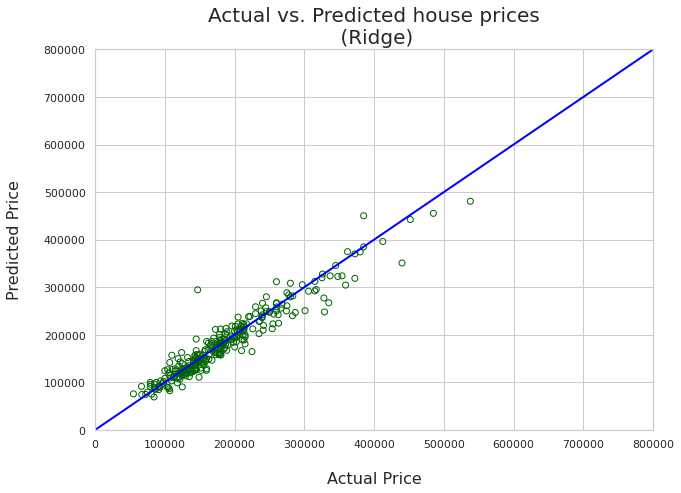

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="darkgreen", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "blue", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

#### Lasso regression

In [ ]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 0.0006866488450042998}
Best R² (train): 0.9032368001443306


In [ ]:
# Lasso Regressor with the best hyperparameters
lasso_mod = Lasso(alpha=lasso_cv.best_params_["alpha"])

# Fit the model on train set
lasso_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lasso_mod.predict(X_test)

print(f"- {lasso_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Lasso
R²: 0.914191710176632
RMSE: 0.11484649367382598


In [ ]:
# Save the model results into lists
model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

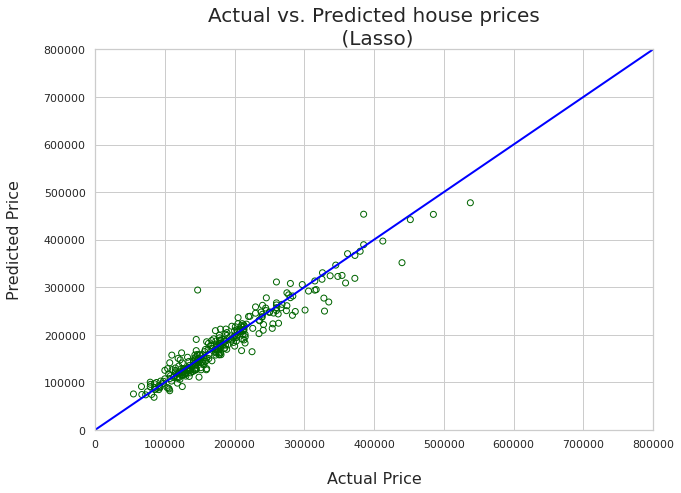

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="darkgreen", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "blue", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

#### XGBoost regression

In [ ]:
# Define hyperparameters
tuned_parameters = {"max_depth": [3],
                    "colsample_bytree": [0.3, 0.7],
                    "learning_rate": [0.01, 0.05, 0.1],
                    "n_estimators": [100, 500]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[05:08:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.888900380530741


In [ ]:
# XGB Regressor with the best hyperparameters
xgbr_mod = XGBRegressor(seed=20,
                        colsample_bytree=xgbr_cv.best_params_["colsample_bytree"],
                        learning_rate=xgbr_cv.best_params_["learning_rate"],
                        max_depth=xgbr_cv.best_params_["max_depth"],
                        n_estimators=xgbr_cv.best_params_["n_estimators"])

# Fit the model on train set
xgbr_mod.fit(X_train, y_train)

# Predict on test set
y_pred = xgbr_mod.predict(X_test)

print(f"- {xgbr_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

[05:08:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- XGBRegressor
R²: 0.9100700956632052
RMSE: 0.11757234570421052


In [ ]:
# Save the model results into lists
model_list.append(xgbr_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

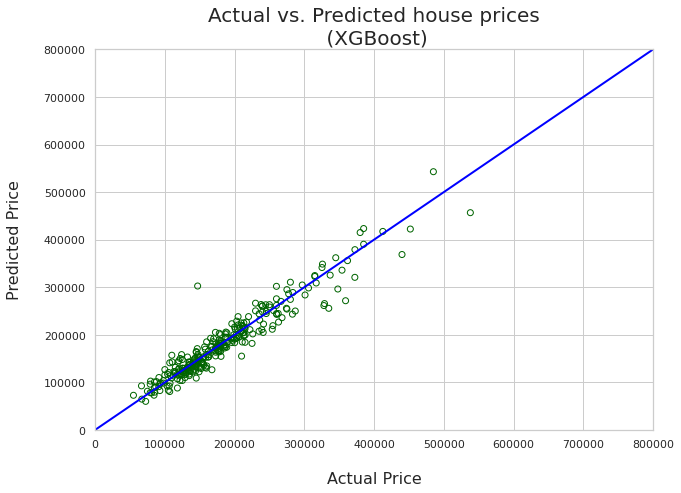

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="darkgreen", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "blue", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

#### LightGBM regression

In [ ]:
# Define hyperparameters
tuned_parameters = {"max_depth": [3, 6, 10], "learning_rate": [
    0.01, 0.05, 0.1], "n_estimators": [100, 500, 1000], }

# GridSearch
lgbm_cv = GridSearchCV(estimator=LGBMRegressor(
), param_grid=tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lgbm_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lgbm_cv.best_params_}\n")
print(f"Best R²: {lgbm_cv.best_score_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.88023975206092


In [ ]:
# LGBM Regressor with the best hyperparameters
lgbm_mod = LGBMRegressor(learning_rate=lgbm_cv.best_params_["learning_rate"],
                         max_depth=lgbm_cv.best_params_["max_depth"],
                         n_estimators=lgbm_cv.best_params_["n_estimators"])

# Fit the model on train set
lgbm_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lgbm_mod.predict(X_test)

print(f"- {lgbm_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- LGBMRegressor
R²: 0.9091011399508977
RMSE: 0.11820404420784965


In [ ]:
# Save the model results into lists
model_list.append(lgbm_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

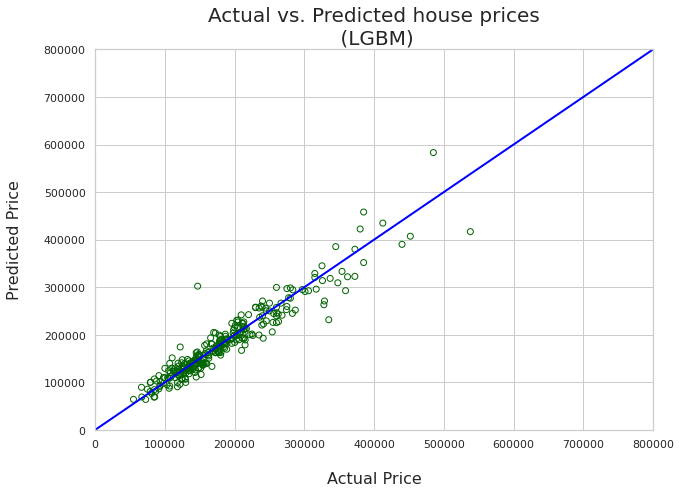

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (LGBM)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="darkgreen", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "blue", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### IV.3 Choosing the best model

In [ ]:
# Create a table with pd.DataFrame
model_results = pd.DataFrame({"Model": model_list,
                              "R²": r2_list,
                              "RMSE": rmse_list})

model_results

,Model,R²,RMSE
0,Ridge,0.9131,0.1156
1,Lasso,0.9142,0.1148
2,XGBRegressor,0.9101,0.1176
3,LGBMRegressor,0.9091,0.1182


### IV.4 Prediction on 'House Prices-Advanced Regression Techniques' test data set

In [ ]:
# Predictions from Lasso model
predictions_list = xgbr_mod.predict(data_test_baru)

# Conversion of logarithmic predictions to logical data Sale Price
saleprice_preds = np.exp(predictions_list)

# DataFrame of test ID and their corresponding predictions
output = pd.DataFrame({"Id": daftar_id_test,
                       "SalePrice": saleprice_preds})
output.head(10)

,Id,SalePrice
0,1461,125374.851562
1,1462,158918.484375
2,1463,180527.546875
3,1464,202400.031250
4,1465,187847.328125
5,1466,174716.843750
6,1467,177451.468750
7,1468,162368.000000
8,1469,183428.328125
9,1470,126300.585938
